In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 7

In [2]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Capstone 2

/content/drive/MyDrive/Capstone 2


In [11]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/astronomy_dataloader_v{version}.pkl")

In [13]:
dls = torch.load(f"dataloaders/astronomy_dataloader_v{version}.pkl")

<ipython-input-13-23eae18ed186>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dls = torch.load(f"dataloaders/astronomy_dataloader_v{version}.pkl")


In [14]:
dls.train.vocab

['Andromeda Galaxy', 'Black Holes', 'Crab Nebula', 'Eagle Nebula', 'Earth Planet', 'Exoplanets', 'Jupiter Planet', 'Mars Planet', 'Mercury Planet', 'Milky Way Galaxy', 'Neptune Planet', 'Orion Nebula', 'Saturn Planet', 'Supernova Remnants', 'Triangulum Galaxy', 'Uranus Planet', 'Venus Planet']

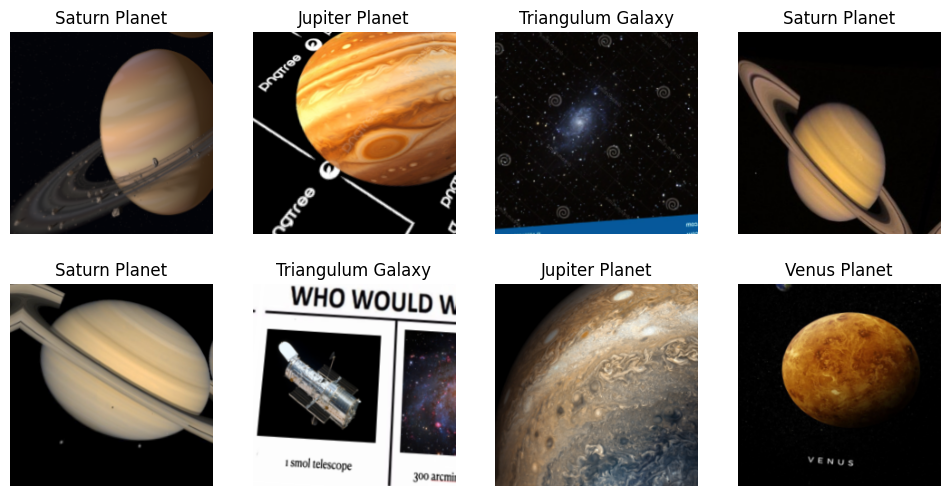

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


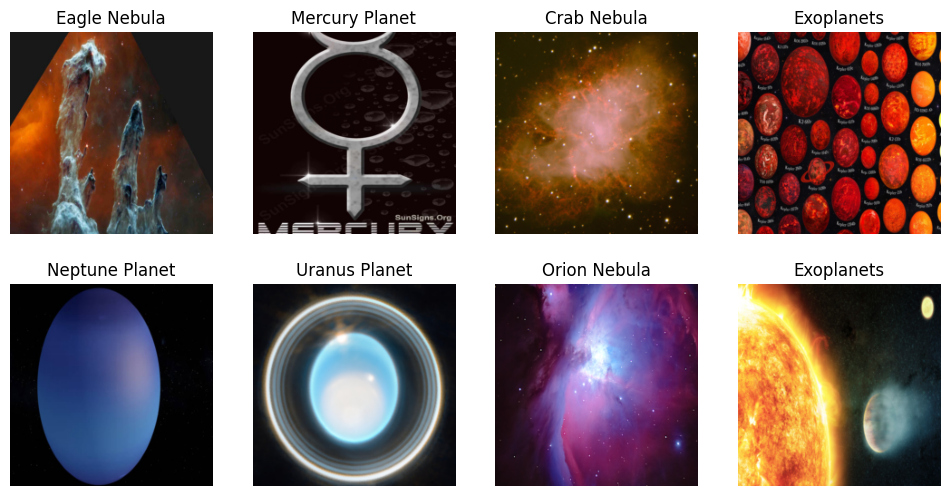

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [ ]:
# model.load(f"astronomy-recognizer-v{version}")

In [ ]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.308467,0.959181,0.265306,0.734694,01:48


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.152173,0.690145,0.224490,0.775510,01:41
1,0.952056,0.642789,0.183673,0.816327,01:40
2,0.695091,0.531034,0.151020,0.848980,01:41
3,0.465392,0.543913,0.151020,0.848980,01:40
4,0.399484,0.535374,0.151020,0.848980,01:40


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb

In [ ]:
model.save(f"astronomy-recognizer-v{version}")

Path('models/astronomy-recognizer-v8.pth')

In [ ]:
# model.load(f"astronomy-recognizer-v{version}")

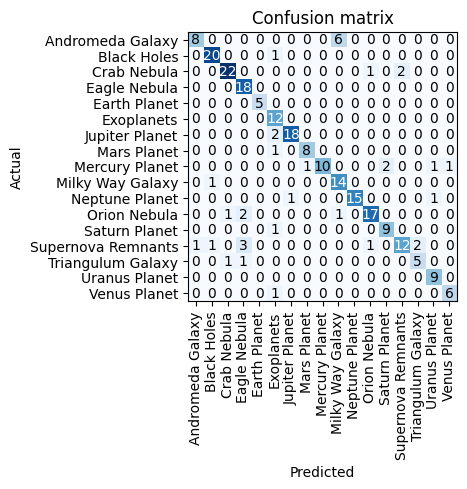

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

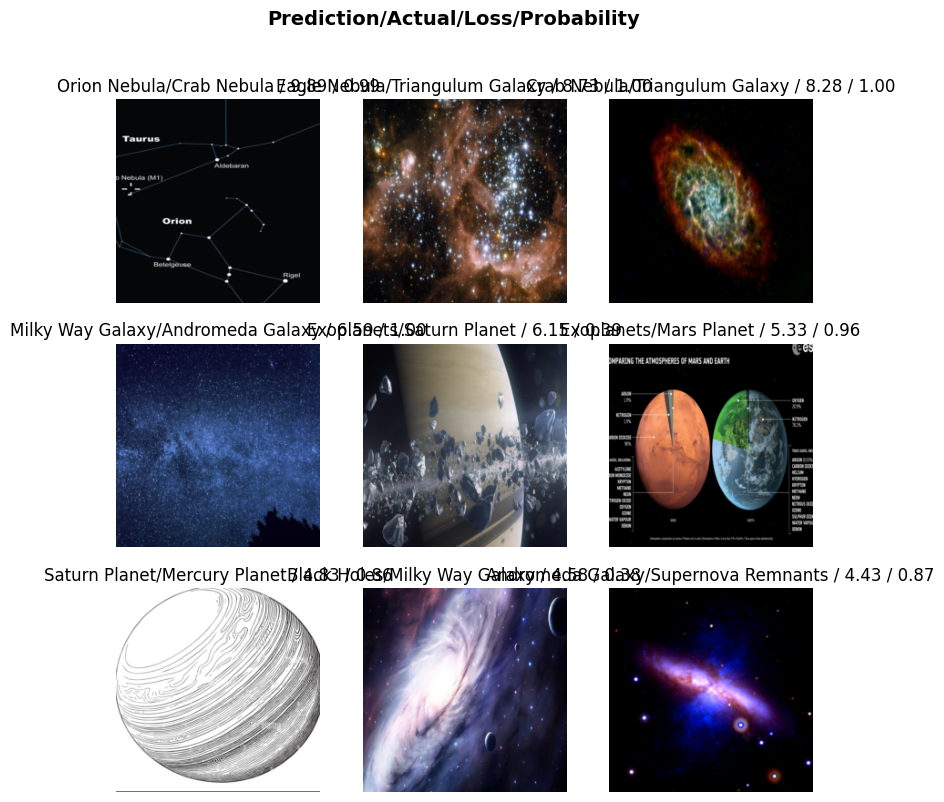

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")

In [ ]:
model.export(f"{model_path}/astronomy-recognizer-v{version}.pkl")